In [10]:
def pod(x):
    YoN= np.random.random()
    if YoN<= x:   #only proliferates over dispesion x% of the time
        pord= 1
    else:
        pord= 0
    return pord     

In [11]:
def prolif(x):
    YoN= np.random.random()
    if YoN<= x:   #only proliferates into empty cellx% of the time
        pn= 1
    else:
        pn= 0
    return pn    

In [12]:
def disp(x):
    YoN= np.random.random()
    if YoN<= x:   #only disperses into empty cell x% of the time
        dispd= 1
    else:
        dispd= 0
    return dispd      

In [13]:
def diftime(x):
    YoN= np.random.random()
    if YoN<= x:   #1s only differentiate on their own x% of the time
        diferentiation= 1
    else:
        diferentiation= 0
    return diferentiation

In [14]:
def difon(x):
    YoN= np.random.random()
    if YoN<= x:   #1 will be differentiated by neighbors x% of the time
        diferentiation= 1
    else:
        diferentiation= 0
    return diferentiation

In [15]:
def dif23(x):
    YoN= np.random.random()
    if YoN<= x:   #1 will differentiate to 2 instead of 3 x% of the time if it is neighbored by 2 and 3 that both want to differentiate it
        diferentiation23= 2
    else:
        diferentiation23= 3
    return diferentiation23

In [16]:
import numpy as np
nval= np.random.choice([2,3])
print(nval)

3


In [17]:
import numpy as np
import statistics as st
import random


def update_a_cell(universe,js, jn, time, timeofdif, prolifprob,dispprob,difprob,dif2o3,difnbrprob):
    limits1,limits2= universe.shape #determines dimensions of the universe
    rand_cell= np.random.randint(limits1, size= 2) #selects a random column and row within the universe to pick a random cell (could also use limit2 if the universe is a square)
    row, col = rand_cell     #assigns the first random number to the row and the second to the column
    val= universe[row, col]  #determines the value of the cell at the random location in the universe
    
    neighborsp = []     #initializes an array that will contain each of the neighbors
    neighborsd = []     #initializes an array of the cells that can disperse into a cell
    collisions=0        #initializing collision counter
    
    nval= 10 #random initial value for the new value of the cell, if it remains this value the cell will remain as is
    
    diddif=0
    dif2o3= np.random.random()
    if val==1 and time>timeofdif:
        if diftime(difprob)==1:
            nval= dif23(dif2o3)
            diddif=1
    else:


        if row!= 0:
            neighborsp.append(universe[row-1][col]) #making sure that the function doesn't look for the immediate lower neighbor if the cell is at the bottom of the universe
        if row!= limits1-1:
            neighborsp.append(universe[row+1][col])#making sure that the function doesn't look for the immediate upper neighbor if the cell is at the top of the universe
        if col!= 0:
            neighborsp.append(universe[row][col-1])#making sure that the function doesn't look for the immediate left neighbor if the cell is at the leftmost point of the universe
        if col!= limits1-1:
            neighborsp.append(universe[row][col+1])#making sure that the function doesn't look for the immediate right neighbor if the cell is at the rightmost point of the universe

        if row> 0+js*jn:
            neighborsd.append(universe[row-js*jn][col]) #making sure that the simulation doesnt try to make a cell outside of the universe disperse into the randomly selected cell
        if row< limits1-js*jn:
            neighborsd.append(universe[row+js*jn][col])
        if col> 0+js*jn:
            neighborsd.append(universe[row][col-js*jn])
        if col< limits1-js*jn:
            neighborsd.append(universe[row][col+js*jn])
        #js represents jump size (number of cells a cell can move) and jn represents jump number (number of times a cell can jump at that length)

        for nsp in neighborsp:  #counts the number of each type of immediate neighbor cells
            pcount1= 0       #each time a number is seen, it is added to each count
            pcount2= 0
            pcount3= 0
            if nsp == 1:
                pcount1+=1
            if nsp == 2:
                pcount2+=1
            if nsp == 3:
                pcount3+=1

        for nsd in neighborsd:  #counts the number of each type of cell that can disperse into it
            dcount1= 0       #each time a number is seen, it is added to each count
            dcount2= 0
            dcount3= 0
            if nsd == 1:
                dcount1+=1
            if nsd == 2:
                dcount2+=1
            if nsd == 3:
                dcount3+=1


        if val==0:       #if the cell=0, neighbors can proliferate or disperse into it
            if pcount1>0:    #if 1 an immediate neighbor it can proliferate into the cell, making it 1
                if prolif(prolifprob)==1 and disp(dispprob)==0:    #if the randomly selected cell will be proliferated into and not dispersed into, the empty cell will become 1
                    nval=1       #nval is then set to 1
                elif prolif(prolifprob)==0 and disp(dispprob)==1: #if the randomly selected cell will not be proliferated into will be dispersed into, the empty cell will become 1
                    nval=1

                    if row-js*jn >= 0:
                        if universe[row-js*jn][col]== 1:    #one of the possible dispersing cells containing a 1 will become zero
                            universe[row-js*jn][col]=0   #if a cell is equal to 1, it is added to the array of possible cells dispersing
                            collisions+=1
                    if row+js*jn <= limits1-1:
                        if universe[row+js*jn][col]== 1:
                            universe[row+js*jn][col]=0
                            collisions+=1
                    if col-js*jn >= 0:
                        if universe[row][col-js*jn]== 1:
                            universe[row][col-js*jn]=0
                            collisions+=1
                    if col+js*jn <= limits1-1:
                        if universe[row][col+js*jn]== 1:
                            universe[row][col+js*jn]=0
                            collisions+=1

                elif prolif(prolifprob)==1 and disp(dispprob)==1:       #if the randomly selected cell will be proliferated into and will be dispersed into, the empty cell will become 1
                    nval=1

                    if row-js*jn >=0:
                        if universe[row-js*jn][col]== 1 and row+js*jn < limits1-1:                    #dispersion and proliferation into the empty cell results in a collision (cell death)
                            universe[row-js*jn][col]= 0       
                            collisions+=1                 #the one of the possible cells that can disperse into the empty cell will become zero (die)
                    if row+js*jn <= limits1-1:
                        if universe[row+js*jn][col]== 1:
                            universe[row+js*jn][col]= 0
                            collisions+=1
                    if col-js*jn >= 0:
                        if universe[row][col-js*jn]== 1:
                            universe[row][col-js*jn]
                            collisions+=1
                    if col+js*jn <= limits1-1:
                        if universe[row][col+js*jn]== 1:
                            universe[row][col+js*jn]=0
                            collisions+=1

                    collisions+=1                                       #if a collision occurs, 1 will be added to the total number of collisions
                else: 
                    universe[row,col]=0    #if the odds decide that neighbors will not proliferate or disperse into the empty cell, the cell remains zero

        elif val==1 and diddif==0:
              #if the randomly selected cell is a 1, neighbors can cause it to differentiate
            if pcount2 > pcount3==0:    #if 2 is the most common cell around it, the 1 will possibly become a 2
                if difon(difnbrprob)==1:    #determines if the neighbors will differentiate the 1 into a 2, 1 outcome means the cell will be differentiated
                    nval=2
                else:
                    universe[row,col]=1 #if the odds decide that the selected cell will not be differentiated, the cell remains a 1

            elif pcount3> pcount2:         #if 3 is the most common cell around it, the 1 will possibly become a 3
                if difon(difnbrprob)==1:    
                    nval=3
                else:
                    universe[row,col]=1      #if the odds decide that neighbors will not cause the 1 to differentiate, the cell remains a 1

            elif pcount3== pcount2 and pcount2>0:         
                C=np.random.random()
                if difon(difnbrprob)==1 and C>=0.5:    #if the number of 2s and 3s around a cell are equal there is a 50% chance it will become either one of them
                    nval=3
                elif difon(difnbrprob)==1 and C<0.5:
                    nval=2
                else:
                    nval=1    #if the odds decide that neighbors will not cause the 1 to differentiate, the cell remains a 1
            else:
                nval=1

        elif val==2:      #if the selected cell is a 2, neighbors can't effect it
            nval= 2
        elif val==3:
            nval= 3       #if the selected cell is a 3, neighbors can't effect it

    if nval== 10:                 #if nval is still 10, the original value will remain at the position
        universe[row,col]= val
    else:
        universe[row,col]= nval    #if nval is not 10, the new value should be placed at the position
    
    #print(collisions)
    return universe
    

In [9]:
from IPython.display import clear_output
from time import sleep 
import matplotlib.pyplot as plt

musclesample= np.random.randint(2, size = (31,31))

n = 10000
for i in range(n): 
    
    plt.imshow(update_a_cell(musclesample, 2,2,i, 50,0.99,0.4, 0.5,0.5,0.4,), cmap = 'magma')
    plt.show()
    #print(update_a_cell(musclesample, 2,2,i, 50,0.4,0.4, 0.4, 0.5,0.5,0.4))
    sleep(.05)
    
    universe = update_a_cell(musclesample, 2,2, i, 50, 0.99,0.4, 0.4, 0.5,0.5)
    
    clear_output(wait=True)

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [18]:
def death(x):
    YoN= np.random.random()
    if YoN<= x:   #the cell will die x% of times
        death= 1
    else:
        death= 0
    return death     

In [19]:
import numpy as np
import statistics as st
import random


def update_a_cell_with_death(universe,js, jn, time, timeofdif, prolifprob,dispprob,difprob,dif2o3,difnbrprob, deathprob):
    limits1,limits2= universe.shape #determines dimensions of the universe
    rand_cell= np.random.randint(limits1, size= 2) #selects a random column and row within the universe to pick a random cell (could also use limit2 if the universe is a square)
    row, col = rand_cell     #assigns the first random number to the row and the second to the column
    val= universe[row, col]  #determines the value of the cell at the random location in the universe
    
    neighborsp = []     #initializes an array that will contain each of the neighbors
    neighborsd = []     #initializes an array of the cells that can disperse into a cell
    collisions=0        #initializing collision counter
    
    nval= 10 #random initial value for the new value of the cell, if it remains this value the cell will remain as is
    
    diddif=0
    #dif2o3= np.random.random()
    if val==1 and time>timeofdif:
        if diftime(difprob)==1:
            nval= dif23(dif2o3)
            diddif=1
    else:



        itdied=0
        if val== 1 and death(deathprob)==1 and diddif==0:
            nval=0
            itdied=1
        elif val== 2 and death(deathprob)==1 and diddif==0:
            nval=0
            itdied=1
        elif val== 3 and death(deathprob)==1 and diddif==0:
            nval=0
            itdied=1
        else:
            nval=10
            itdied=0




        if row!= 0:
            neighborsp.append(universe[row-1][col]) #making sure that the function doesn't look for the immediate lower neighbor if the cell is at the bottom of the universe
        if row!= limits1-1:
            neighborsp.append(universe[row+1][col])#making sure that the function doesn't look for the immediate upper neighbor if the cell is at the top of the universe
        if col!= 0:
            neighborsp.append(universe[row][col-1])#making sure that the function doesn't look for the immediate left neighbor if the cell is at the leftmost point of the universe
        if col!= limits1-1:
            neighborsp.append(universe[row][col+1])#making sure that the function doesn't look for the immediate right neighbor if the cell is at the rightmost point of the universe

        if row> 0+js*jn:
            neighborsd.append(universe[row-js*jn][col]) #making sure that the simulation doesnt try to make a cell outside of the universe disperse into the randomly selected cell
        if row< limits1-js*jn:
            neighborsd.append(universe[row+js*jn][col])
        if col> 0+js*jn:
            neighborsd.append(universe[row][col-js*jn])
        if col< limits1-js*jn:
            neighborsd.append(universe[row][col+js*jn])
        #js represents jump size (number of cells a cell can move) and jn represents jump number (number of times a cell can jump at that length)

        for nsp in neighborsp:  #counts the number of each type of immediate neighbor cells
            pcount1= 0       #each time a number is seen, it is added to each count
            pcount2= 0
            pcount3= 0
            if nsp == 1:
                pcount1+=1
            if nsp == 2:
                pcount2+=1
            if nsp == 3:
                pcount3+=1

        for nsd in neighborsd:  #counts the number of each type of cell that can disperse into it
            dcount1= 0       #each time a number is seen, it is added to each count
            dcount2= 0
            dcount3= 0
            if nsd == 1:
                dcount1+=1
            if nsd == 2:
                dcount2+=1
            if nsd == 3:
                dcount3+=1


        if val==0:       #if the cell=0, neighbors can proliferate or disperse into it
            if pcount1>0:    #if 1 an immediate neighbor it can proliferate into the cell, making it 1
                if prolif(prolifprob)==1 and disp(dispprob)==0:    #if the randomly selected cell will be proliferated into and not dispersed into, the empty cell will become 1
                    nval=1       #nval is then set to 1
                elif prolif(prolifprob)==0 and disp(dispprob)==1: #if the randomly selected cell will not be proliferated into will be dispersed into, the empty cell will become 1
                    nval=1

                    if row-js*jn >= 0:
                        if universe[row-js*jn][col]== 1:    #one of the possible dispersing cells containing a 1 will become zero
                            universe[row-js*jn][col]=0   #if a cell is equal to 1, it is added to the array of possible cells dispersing
                            collisions+=1
                    if row+js*jn <= limits1-1:
                        if universe[row+js*jn][col]== 1:
                            universe[row+js*jn][col]=0
                            collisions+=1
                    if col-js*jn >= 0:
                        if universe[row][col-js*jn]== 1:
                            universe[row][col-js*jn]=0
                            collisions+=1
                    if col+js*jn <= limits1-1:
                        if universe[row][col+js*jn]== 1:
                            universe[row][col+js*jn]=0
                            collisions+=1

                elif prolif(prolifprob)==1 and disp(dispprob)==1:       #if the randomly selected cell will be proliferated into and will be dispersed into, the empty cell will become 1
                    nval=1

                    if row-js*jn >=0:
                        if universe[row-js*jn][col]== 1 and row+js*jn < limits1-1:                    #dispersion and proliferation into the empty cell results in a collision (cell death)
                            universe[row-js*jn][col]= 0       
                            collisions+=1                 #the one of the possible cells that can disperse into the empty cell will become zero (die)
                    if row+js*jn <= limits1-1:
                        if universe[row+js*jn][col]== 1:
                            universe[row+js*jn][col]= 0
                            collisions+=1
                    if col-js*jn >= 0:
                        if universe[row][col-js*jn]== 1:
                            universe[row][col-js*jn]
                            collisions+=1
                    if col+js*jn <= limits1-1:
                        if universe[row][col+js*jn]== 1:
                            universe[row][col+js*jn]=0
                            collisions+=1

                    collisions+=1                                       #if a collision occurs, 1 will be added to the total number of collisions
                else: 
                    universe[row,col]=0    #if the odds decide that neighbors will not proliferate or disperse into the empty cell, the cell remains zero

        elif val==1 and diddif==0 and itdied==0:
              #if the randomly selected cell is a 1, neighbors can cause it to differentiate
            if pcount2 > pcount3==0:    #if 2 is the most common cell around it, the 1 will possibly become a 2
                if difon(difnbrprob)==1:    #determines if the neighbors will differentiate the 1 into a 2, 1 outcome means the cell will be differentiated
                    nval=2
                else:
                    universe[row,col]=1 #if the odds decide that the selected cell will not be differentiated, the cell remains a 1

            elif pcount3> pcount2:         #if 3 is the most common cell around it, the 1 will possibly become a 3
                if difon(difnbrprob)==1:    
                    nval=3
                else:
                    universe[row,col]=1      #if the odds decide that neighbors will not cause the 1 to differentiate, the cell remains a 1

            elif pcount3== pcount2 and pcount2>0:         
                C=np.random.random()
                if difon(difnbrprob)==1 and C>=0.5:    #if the number of 2s and 3s around a cell are equal there is a 50% chance it will become either one of them
                    nval=3
                elif difon(difnbrprob)==1 and C<0.5:
                    nval=2
                else:
                    nval=1    #if the odds decide that neighbors will not cause the 1 to differentiate, the cell remains a 1
            else:
                nval=1

        elif val==2 and itdied==0:      #if the selected cell is a 2, neighbors can't effect it
            nval= 2
        elif val==3 and itdied==0:
            nval= 3       #if the selected cell is a 3, neighbors can't effect it

    if nval== 10:                 #if nval is still 10, the original value will remain at the position
        universe[row,col]= val
    else:
        universe[row,col]= nval    #if nval is not 10, the new value should be placed at the position
    
    #print(collisions)
    return universe
    

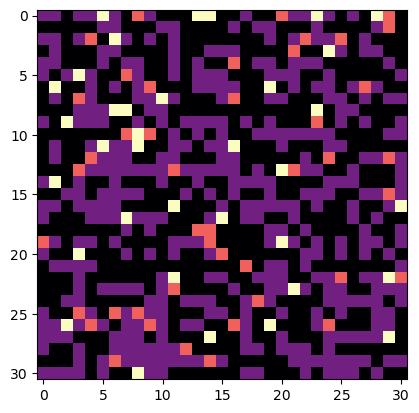

KeyboardInterrupt: 

In [20]:
from IPython.display import clear_output
from time import sleep 
import matplotlib.pyplot as plt

musclesample= np.random.randint(2, size = (31,31))

n = 10000
for i in range(n): 
    #print(i)
    plt.imshow(update_a_cell_with_death(musclesample, 2,2,i, 20,0.4,0.4, 0.4, 0.5,0.5,0.4), cmap = 'magma')
    plt.show()
    #print(update_a_cell(musclesample, 2,2,i, 50,0.4,0.4, 0.4, 0.5,0.5,0.4))
    sleep(.05)
    
    universe = update_a_cell_with_death(musclesample, 2,2, i, 20, 0.4,0.4, 0.4, 0.5,0.5,0.4)
    
    clear_output(wait=True)

In [21]:
def infection(x):
    YoN= np.random.random()
    if YoN<= x:   #only proliferates 5% of the time
        death= 1
    else:
        death= 0
    return death     

In [22]:
import numpy as np
import statistics as st
import random


def update_a_cell_with_death_with_infection(universe,js, jn, time, timeofdif, prolifprob,dispprob,difprob,dif2o3,difnbrprob, deathprob,infprob):
    limits1,limits2= universe.shape #determines dimensions of the universe
    rand_cell= np.random.randint(limits1, size= 2) #selects a random column and row within the universe to pick a random cell (could also use limit2 if the universe is a square)
    row, col = rand_cell     #assigns the first random number to the row and the second to the column
    val= universe[row, col]  #determines the value of the cell at the random location in the universe
    
    neighborsp = []     #initializes an array that will contain each of the neighbors
    neighborsd = []     #initializes an array of the cells that can disperse into a cell
    collisions=0        #initializing collision counter
    
    nval= 10 #random initial value for the new value of the cell, if it remains this value the cell will remain as is
    
    diddif=0
    
    if val==1 and time>timeofdif:
        if diftime(difprob)==1:
            nval= dif23(dif2o3)
            diddif=1
            
    else:
        itdied=0
        if val== 1 and death(deathprob)==1 and diddif==0:
            nval=0
            itdied=1
        elif val== 2 and death(deathprob)==1 and diddif==0:
            nval=0
            itdied=1
        elif val== 3 and death(deathprob)==1 and diddif==0:
            nval=0
            itdied=1
        else:
            nval=10
            itdied=0




        if row!= 0:
            neighborsp.append(universe[row-1][col]) #making sure that the function doesn't look for the immediate lower neighbor if the cell is at the bottom of the universe
        if row!= limits1-1:
            neighborsp.append(universe[row+1][col])#making sure that the function doesn't look for the immediate upper neighbor if the cell is at the top of the universe
        if col!= 0:
            neighborsp.append(universe[row][col-1])#making sure that the function doesn't look for the immediate left neighbor if the cell is at the leftmost point of the universe
        if col!= limits1-1:
            neighborsp.append(universe[row][col+1])#making sure that the function doesn't look for the immediate right neighbor if the cell is at the rightmost point of the universe

        if row> 0+js*jn:
            neighborsd.append(universe[row-js*jn][col]) #making sure that the simulation doesnt try to make a cell outside of the universe disperse into the randomly selected cell
        if row< limits1-js*jn:
            neighborsd.append(universe[row+js*jn][col])
        if col> 0+js*jn:
            neighborsd.append(universe[row][col-js*jn])
        if col< limits1-js*jn:
            neighborsd.append(universe[row][col+js*jn])
        #js represents jump size (number of cells a cell can move) and jn represents jump number (number of times a cell can jump at that length)

        pcount1= 0       #each time a number is seen, it is added to each count
        pcount2= 0
        pcount3= 0
        pcount4= 0
        for nsp in neighborsp:  #counts the number of each type of immediate neighbor cells
            if nsp == 1:
                pcount1+=1
            if nsp == 2:
                pcount2+=1
            if nsp == 3:
                pcount3+=1
            if nsp ==4:
                pcount4+=1

        dcount1= 0       #each time a number is seen, it is added to each count
        dcount2= 0
        dcount3= 0
        for nsd in neighborsd:  #counts the number of each type of cell that can disperse into it
            if nsd == 1:
                dcount1+=1
            if nsd == 2:
                dcount2+=1
            if nsd == 3:
                dcount3+=1


        if val==0:       #if the cell=0, neighbors can proliferate or disperse into it
            if pcount1>0:    #if 1 an immediate neighbor it can proliferate into the cell, making it 1
                if prolif(prolifprob)==1 and disp(dispprob)==0:    #if the randomly selected cell will be proliferated into and not dispersed into, the empty cell will become 1
                    nval=1       #nval is then set to 1
                elif prolif(prolifprob)==0 and disp(dispprob)==1: #if the randomly selected cell will not be proliferated into will be dispersed into, the empty cell will become 1
                    nval=1

                    if row-js*jn >= 0:
                        if universe[row-js*jn][col]== 1:    #one of the possible dispersing cells containing a 1 will become zero
                            universe[row-js*jn][col]=0   #if a cell is equal to 1, it is added to the array of possible cells dispersing
                            collisions+=1
                    if row+js*jn <= limits1-1:
                        if universe[row+js*jn][col]== 1:
                            universe[row+js*jn][col]=0
                            collisions+=1
                    if col-js*jn >= 0:
                        if universe[row][col-js*jn]== 1:
                            universe[row][col-js*jn]=0
                            collisions+=1
                    if col+js*jn <= limits1-1:
                        if universe[row][col+js*jn]== 1:
                            universe[row][col+js*jn]=0
                            collisions+=1

                elif prolif(prolifprob)==1 and disp(dispprob)==1:       #if the randomly selected cell will be proliferated into and will be dispersed into, the empty cell will become 1
                    nval=1

                    if row-js*jn >=0:
                        if universe[row-js*jn][col]== 1 and row+js*jn < limits1-1:                    #dispersion and proliferation into the empty cell results in a collision (cell death)
                            universe[row-js*jn][col]= 0       
                            collisions+=1                 #the one of the possible cells that can disperse into the empty cell will become zero (die)
                    if row+js*jn <= limits1-1:
                        if universe[row+js*jn][col]== 1:
                            universe[row+js*jn][col]= 0
                            collisions+=1
                    if col-js*jn >= 0:
                        if universe[row][col-js*jn]== 1:
                            universe[row][col-js*jn]
                            collisions+=1
                    if col+js*jn <= limits1-1:
                        if universe[row][col+js*jn]== 1:
                            universe[row][col+js*jn]=0
                            collisions+=1

                    collisions+=1                                       #if a collision occurs, 1 will be added to the total number of collisions
                else: 
                    universe[row,col]=0    #if the odds decide that neighbors will not proliferate or disperse into the empty cell, the cell remains zero

        elif val==1 and diddif==0 and itdied==0:
              #if the randomly selected cell is a 1, neighbors can cause it to differentiate
            if pcount4>0 and infection(infprob)==1:
                nval=4

            else:
                if pcount2 > pcount3==0:    #if 2 is the most common cell around it, the 1 will possibly become a 2
                    if difon(difnbrprob)==1:    #determines if the neighbors will differentiate the 1 into a 2, 1 outcome means the cell will be differentiated
                        nval=2
                    else:
                        universe[row,col]=1 #if the odds decide that the selected cell will not be differentiated, the cell remains a 1

                elif pcount3> pcount2:         #if 3 is the most common cell around it, the 1 will possibly become a 3
                    if difon(difnbrprob)==1:    
                        nval=3
                    else:
                        universe[row,col]=1      #if the odds decide that neighbors will not cause the 1 to differentiate, the cell remains a 1

                elif pcount3== pcount2 and pcount2>0:         
                    C=np.random.random()
                    if difon(difnbrprob)==1 and C>=0.5:    #if the number of 2s and 3s around a cell are equal there is a 50% chance it will become either one of them
                        nval=3
                    elif difon(difnbrprob)==1 and C<0.5:
                        nval=2
                    else:
                        nval=1    #if the odds decide that neighbors will not cause the 1 to differentiate, the cell remains a 1
                else:
                    nval=1

        elif val==2 and itdied==0:      #if the selected cell is a 2, neighbors can't effect it
            if pcount4>0 and infection(infprob)==1:
                nval=4

            else:
                nval= 2
        elif val==3 and itdied==0:
            if pcount4>0 and infection(infprob)==1:
                nval=4

            else:
                nval= 3       #if the selected cell is a 3, neighbors can't effect it
        elif val==4:
            nval=4
    if nval== 10:                 #if nval is still 10, the original value will remain at the position
        universe[row,col]= val
    else:
        universe[row,col]= nval    #if nval is not 10, the new value should be placed at the position
    
    return universe
    

In [23]:
from IPython.display import clear_output
from time import sleep 
import matplotlib.pyplot as plt

musclesample= np.random.randint(2, size = (21,21))
musclesample[random.randint(0, 20),random.randint(0, 20)]= 4
musclesample[random.randint(0, 20),random.randint(0, 20)]= 4
musclesample[random.randint(0, 20),random.randint(0, 20)]= 4
musclesample[random.randint(0, 20),random.randint(0, 20)]= 4

#update_a_cell_with_death_with_infection(universe,js, jn, time, timeofdif, prolifprob,dispprob,difprob,dif2o3,difnbrprob, deathprob,infprob)
n = 800
for i in range(n): 
    #print(i)
    plt.imshow(update_a_cell_with_death_with_infection(musclesample, 2,2,i, 100,0.4,0.4,  0.9,0.5,0.4,.1,.99), cmap = 'magma')
    plt.show()
    #print(update_a_cell_with_death_with_infection(musclesample, 2,2,i, 100,0.4,0.4,  0.9,0.5,0.4,.1,.99))
    sleep(.05)
    
    universe = update_a_cell_with_death_with_infection(musclesample, 2,2,i, 100,0.4,0.4,  0.9,0.5,0.4,.1,.99)
    
    clear_output(wait=True)

KeyboardInterrupt: 

In [24]:
import numpy as np
import statistics as st
import random


def update_a_cell_with_death_with_infection_with_immunity(universe,js, jn, time, timeofdif, prolifprob,dispprob,difprob,dif2o3,difnbrprob, deathprob,infprob):
    limits1,limits2= universe.shape #determines dimensions of the universe
    rand_cell= np.random.randint(limits1, size= 2) #selects a random column and row within the universe to pick a random cell (could also use limit2 if the universe is a square)
    row, col = rand_cell     #assigns the first random number to the row and the second to the column
    val= universe[row, col]  #determines the value of the cell at the random location in the universe
    
    neighborsp = []     #initializes an array that will contain each of the neighbors
    neighborsd = []     #initializes an array of the cells that can disperse into a cell
    collisions=0        #initializing collision counter
    
    nval= 10 #random initial value for the new value of the cell, if it remains this value the cell will remain as is
    
    diddif=0
    
    if val==1 and time>timeofdif:
        if diftime(difprob)==1:
            nval= dif23(dif2o3)
            diddif=1
            
    else:
        itdied=0
        if val== 1 and death(deathprob)==1 and diddif==0:
            nval=0
            itdied=1
        elif val== 2 and death(deathprob)==1 and diddif==0:
            nval=0
            itdied=1
        elif val== 3 and death(deathprob)==1 and diddif==0:
            nval=0
            itdied=1
        else:
            nval=10
            itdied=0




        if row!= 0:
            neighborsp.append(universe[row-1][col]) #making sure that the function doesn't look for the immediate lower neighbor if the cell is at the bottom of the universe
        if row!= limits1-1:
            neighborsp.append(universe[row+1][col])#making sure that the function doesn't look for the immediate upper neighbor if the cell is at the top of the universe
        if col!= 0:
            neighborsp.append(universe[row][col-1])#making sure that the function doesn't look for the immediate left neighbor if the cell is at the leftmost point of the universe
        if col!= limits1-1:
            neighborsp.append(universe[row][col+1])#making sure that the function doesn't look for the immediate right neighbor if the cell is at the rightmost point of the universe

        if row> 0+js*jn:
            neighborsd.append(universe[row-js*jn][col]) #making sure that the simulation doesnt try to make a cell outside of the universe disperse into the randomly selected cell
        if row< limits1-js*jn:
            neighborsd.append(universe[row+js*jn][col])
        if col> 0+js*jn:
            neighborsd.append(universe[row][col-js*jn])
        if col< limits1-js*jn:
            neighborsd.append(universe[row][col+js*jn])
        #js represents jump size (number of cells a cell can move) and jn represents jump number (number of times a cell can jump at that length)

        pcount1= 0       #each time a number is seen, it is added to each count
        pcount2= 0
        pcount3= 0
        pcount4= 0
        for nsp in neighborsp:  #counts the number of each type of immediate neighbor cells
            if nsp == 1:
                pcount1+=1
            if nsp == 2:
                pcount2+=1
            if nsp == 3:
                pcount3+=1
            if nsp ==4:
                pcount4+=1

        dcount1= 0       #each time a number is seen, it is added to each count
        dcount2= 0
        dcount3= 0
        dcount5= 0
        for nsd in neighborsd:  #counts the number of each type of cell that can disperse into it
            if nsd == 1:
                dcount1+=1
            if nsd == 2:
                dcount2+=1
            if nsd == 3:
                dcount3+=1
            if nsd == 5:
                dcount5+=1


        if val==0:       #if the cell=0, neighbors can proliferate or disperse into it
            nkneighbors= []
            if dcount5>0:
                nval=5
               


            else:
                if pcount1>0:    #if 1 an immediate neighbor it can proliferate into the cell, making it 1
                    if prolif(prolifprob)==1 and disp(dispprob)==0:    #if the randomly selected cell will be proliferated into and not dispersed into, the empty cell will become 1
                        nval=1       #nval is then set to 1
                    elif prolif(prolifprob)==0 and disp(dispprob)==1: #if the randomly selected cell will not be proliferated into will be dispersed into, the empty cell will become 1
                        nval=1

                        if row-js*jn >= 0:
                            if universe[row-js*jn][col]== 1:    #one of the possible dispersing cells containing a 1 will become zero
                                universe[row-js*jn][col]=0   #if a cell is equal to 1, it is added to the array of possible cells dispersing
                                collisions+=1
                        if row+js*jn <= limits1-1:
                            if universe[row+js*jn][col]== 1:
                                universe[row+js*jn][col]=0
                                collisions+=1
                        if col-js*jn >= 0:
                            if universe[row][col-js*jn]== 1:
                                universe[row][col-js*jn]=0
                                collisions+=1
                        if col+js*jn <= limits1-1:
                            if universe[row][col+js*jn]== 1:
                                universe[row][col+js*jn]=0
                                collisions+=1

                    elif prolif(prolifprob)==1 and disp(dispprob)==1:       #if the randomly selected cell will be proliferated into and will be dispersed into, the empty cell will become 1
                        nval=1

                        if row-js*jn >=0:
                            if universe[row-js*jn][col]== 1 and row+js*jn < limits1-1:                    #dispersion and proliferation into the empty cell results in a collision (cell death)
                                universe[row-js*jn][col]= 0       
                                collisions+=1                 #the one of the possible cells that can disperse into the empty cell will become zero (die)
                        if row+js*jn <= limits1-1:
                            if universe[row+js*jn][col]== 1:
                                universe[row+js*jn][col]= 0
                                collisions+=1
                        if col-js*jn >= 0:
                            if universe[row][col-js*jn]== 1:
                                universe[row][col-js*jn]
                                collisions+=1
                        if col+js*jn <= limits1-1:
                            if universe[row][col+js*jn]== 1:
                                universe[row][col+js*jn]=0
                                collisions+=1

                        collisions+=1                                       #if a collision occurs, 1 will be added to the total number of collisions
                    else: 
                        universe[row,col]=0    #if the odds decide that neighbors will not proliferate or disperse into the empty cell, the cell remains zero

        elif val==1 and diddif==0 and itdied==0:
              #if the randomly selected cell is a 1, neighbors can cause it to differentiate
            if pcount4>0 and infection(infprob)==1:
                nval=4

            else:
                if pcount2 > pcount3==0:    #if 2 is the most common cell around it, the 1 will possibly become a 2
                    if difon(difnbrprob)==1:    #determines if the neighbors will differentiate the 1 into a 2, 1 outcome means the cell will be differentiated
                        nval=2
                    else:
                        universe[row,col]=1 #if the odds decide that the selected cell will not be differentiated, the cell remains a 1

                elif pcount3> pcount2:         #if 3 is the most common cell around it, the 1 will possibly become a 3
                    if difon(difnbrprob)==1:    
                        nval=3
                    else:
                        universe[row,col]=1      #if the odds decide that neighbors will not cause the 1 to differentiate, the cell remains a 1

                elif pcount3== pcount2 and pcount2>0:         
                    C=np.random.random()
                    if difon(difnbrprob)==1 and C>=0.5:    #if the number of 2s and 3s around a cell are equal there is a 50% chance it will become either one of them
                        nval=3
                    elif difon(difnbrprob)==1 and C<0.5:
                        nval=2
                    else:
                        nval=1    #if the odds decide that neighbors will not cause the 1 to differentiate, the cell remains a 1
                else:
                    nval=1

        elif val==2 and itdied==0:      #if the selected cell is a 2, neighbors can't effect it
            if pcount4>0 and infection(infprob)==1:
                nval=4

            else:
                nval= 2
        elif val==3 and itdied==0:
            if pcount4>0 and infection(infprob)==1:
                nval=4

            else:
                nval= 3       #if the selected cell is a 3, neighbors can't effect it
        elif val==4:
            if np.any(universe[row][:])==5:
                nval=5
            elif np.any(universe[:][col])==5:
                nval=5
            else:
                nval=4
        elif val==5:
            nval=5
            
    if nval== 10:                 #if nval is still 10, the original value will remain at the position
        universe[row,col]= val
    else:
        universe[row,col]= nval    #if nval is not 10, the new value should be placed at the position
    
    return universe
    

In [25]:
from IPython.display import clear_output
from time import sleep 
import matplotlib.pyplot as plt

musclesample= np.random.randint(2, size = (21,21))
musclesample[random.randint(0, 20),random.randint(0, 20)]= 4
musclesample[random.randint(0, 20),random.randint(0, 20)]= 4
musclesample[random.randint(0, 20),random.randint(0, 20)]= 4
musclesample[random.randint(0, 20),random.randint(0, 20)]= 4

musclesample[random.randint(0, 20),random.randint(0, 20)]= 5
musclesample[random.randint(0, 20),random.randint(0, 20)]= 5
musclesample[random.randint(0, 20),random.randint(0, 20)]= 5
musclesample[random.randint(0, 20),random.randint(0, 20)]= 5

#update_a_cell_with_death_with_infection(universe,js, jn, time, timeofdif, prolifprob,dispprob,difprob,dif2o3,difnbrprob, deathprob,infprob)
n = 800
for i in range(n): 
    #print(i)
    plt.imshow(update_a_cell_with_death_with_infection_with_immunity(musclesample, 2,2,i, 100,0.4,0.4,  0.9,0.5,0.4,.1,.99), cmap = 'magma')
    plt.show()
    print(update_a_cell_with_death_with_infection_with_immunity(musclesample, 2,2,i, 100,0.4,0.4,  0.9,0.5,0.4,.1,.99))
    sleep(.05)
    
    universe = update_a_cell_with_death_with_infection_with_immunity(musclesample, 2,2,i, 100,0.4,0.4,  0.9,0.5,0.4,.1,.99)
    
    clear_output(wait=True)

KeyboardInterrupt: 

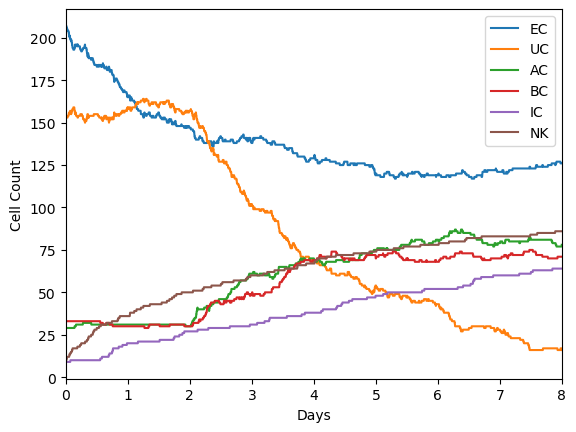

In [26]:
# create lists to store counts of each cell type

n=3200
zeros = []
ones = []
twos = []
threes = []
fours = []
fives = []

for i in range(n):
    universe = update_a_cell_with_death_with_infection_with_immunity(musclesample, 1,5,i, 800,0.54,0.54,  0.5,0.5,0.05,.1,.99)
    count_zeros = np.count_nonzero(universe == 0)
    count_ones = np.count_nonzero(universe == 1)
    count_twos = np.count_nonzero(universe == 2)
    count_threes = np.count_nonzero(universe == 3)
    count_fours = np.count_nonzero(universe == 4)
    count_fives = np.count_nonzero(universe == 5)
    
    #append counts to respective lists
    zeros.append(count_zeros)
    ones.append(count_ones)
    twos.append(count_twos)
    threes.append(count_threes)
    fours.append(count_fours)
    fives.append(count_fives)
    clear_output(wait=True)

# plot counts over time
time = np.arange(0, n/400, 1/400)
plt.xlabel('Days')
plt.ylabel('Cell Count')
plt.xlim(0,8)
plt.plot(time, zeros, label='EC')
plt.plot(time, ones, label='UC')
plt.plot(time, twos, label='AC')
plt.plot(time, threes, label='BC')
plt.plot(time, fours, label='IC')
plt.plot(time, fives, label = 'NK')
plt.legend()
plt.show()
#This code should display the cellular automata updating in real time and then plot the number of each cell type over time.
